In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('ds_salaries.csv')

## Data Exploration

### Explore dataset

Mỗi dòng dữ liệu là một bảng ghi về mức lương của một nhà khoa học dữ liệu với các thuộc tính liên quan đến: năm làm việc, kinh nghiệm làm việc, loại hình việc làm (fulltime, parttime, ...), chức vụ, lương, đơn vị tiền lương, tiền lương tính theo USD, nơi cư trú, tỷ lệ làm việc (làm online hay offline), vị trí công ty, kích cỡ công ty

Nếu mỗi dòng chứa các loại bản ghi khác nhau, nghĩa là dữ liệu không nhất quán trong cùng một cột hoặc một dòng có thể đại diện cho các loại thông tin khác nhau, thì điều này có thể gây ra một số vấn đề nghiêm trọng trong phân tích dữ liệu:

1. **Khó khăn trong phân tích và diễn giải**: 
   - Dữ liệu không đồng nhất làm cho việc diễn giải kết quả trở nên khó khăn. Ví dụ, nếu cột `job_title` chứa các vai trò khác nhau nhưng không nhất quán (ví dụ: có cả nhà khoa học dữ liệu và kỹ sư phần mềm), thì sẽ không thể đưa ra kết luận chính xác về mức lương của từng vị trí.

2. **Làm giảm tính chính xác và độ tin cậy của kết quả**:
   - Khi dữ liệu không nhất quán, việc tính toán trung bình, trung vị, hoặc các số liệu thống kê khác sẽ bị sai lệch. Ví dụ, nếu dữ liệu về các mức lương của các vai trò khác nhau được trộn lẫn (ví dụ `salary` và `salary_in_usd` bị đảo lộn), mức lương trung bình tính ra có thể không phản ánh chính xác mức lương thực sự của bất kỳ vai trò nào.

3. **Gây lỗi trong các thuật toán hoặc công cụ phân tích**:
   - Các công cụ và thuật toán máy học thường yêu cầu dữ liệu có định dạng thống nhất. Dữ liệu không đồng nhất có thể dẫn đến lỗi hoặc làm giảm hiệu suất của các mô hình. Ví dụ, nếu dữ liệu về mức lương và vai trò bị lẫn lộn, các mô hình dự đoán sẽ khó hoặc không thể nhận diện chính xác xu hướng và mối quan hệ.

4. **Phải tốn nhiều công sức để tiền xử lý dữ liệu**:
   - Trước khi tiến hành phân tích, sẽ cần phải xử lý làm sạch dữ liệu. Quá trình này mất nhiều thời gian và có thể làm chậm tiến độ dự án, đồng thời đòi hỏi phải làm sạch dữ liệu một cách thủ công hoặc phát triển các quy tắc lọc phức tạp.

5. **Gây khó khăn khi trực quan hóa dữ liệu**:
   - Dữ liệu không nhất quán có thể khiến các biểu đồ và bảng số liệu trở nên khó hiểu hoặc sai lệch. Ví dụ, nếu trong biểu đồ lương, dữ liệu về các vai trò khác nhau bị trộn lẫn mà không phân loại, thì người xem sẽ không thể nhận ra các xu hướng hoặc khác biệt cụ thể giữa các nhóm dữ liệu.

Do đó, việc đảm bảo tính nhất quán của dữ liệu theo từng dòng (mỗi dòng phải đại diện cho một bản ghi cùng loại) là rất quan trọng để đảm bảo độ chính xác và hiệu quả của quá trình phân tích.

Tập dữ liệu có tất cả 11 cột, lần lượt là:

| **Tên cột**            | **Mô tả**        |
|------------------------|-------------------------------------------------------------------------------------------------------|
| `work_year`            | Năm lương được trả (tức năm làm việc)  |
| `experience_level`     | Kinh nghiệm làm việc trong năm đó. (ví dụ: Senior, Entry-level, ...) |
| `employment_type`      | Loại hình làm việc (Fulltime, Parttime, ...)       |
| `job_title`            | Chức vụ/ Chức danh công việc (Ví dụ: Data Analyst, Data Engineer, ...)          |
| `salary`               | Tổng số tiền lương gộp được trả.                      |
| `salary_currency`      | Đơn vị tiền tệ của tiền lương được trả dưới dạng mã tiền tệ ISO 4217.      |
| `salary_in_usd`          | Tiền lương theo đơn vị đô la Mỹ                           |
| `employee_residence`   | Quốc gia cư trú của nhân viên trong năm làm việc theo mã quốc gia ISO 3166.            |
| `remote_ratio`         | Tổng khối lượng công việc được thực hiện từ xa (ví dụ: 100% là hoàn toàn làm online)        |
| `company_location`     | Quốc gia đặt văn phòng chính hoặc chi nhánh hợp đồng của người sử dụng lao động.        
| `company_size`         | Số người trung bình đã làm việc cho công ty trong năm.             |


Kiểu dữ liệu mỗi cột là:

In [3]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


May mắn thay, các cột đều được lưu đúng kiểu dữ liệu cần thiết
- Kiểm tra tập dữ liệu ta thấy các cột chứa mức lương ở dạng số nguyên (như là: `salary`, `salary_in_usd`) nên có thể dùng kiểu int64 để lưu trữ
- Cột `work_year` và `remote_ratio` (tỷ lệ phầm trăm) được lưu dưới dạng int64 là hoàn toàn phù hợp
- Các cột còn lại chứa dữ liệu kiểu phân loại như `experience_level`, `employment_type`, `job_title`, `salary_currency`, `employee_residence`, `company_location`, `company_size` đều được lưu dưới dạng object

**Tìm hiểu về phân phối dữ liệu trong các cột**

In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [57]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,2584.0,NaN,NaN,NaN,2022.301084,0.749179,2020.0,2022.0,2022.0,2023.0,2023.0
experience_level,2584,4,SE,1554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,2584,4,FT,2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,2584,93,Data Engineer,598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,2584.0,NaN,NaN,NaN,210365.29644,808037.535609,6000.0,90000.0,134630.0,182562.5,30400000.0
salary_currency,2584,20,USD,2107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,2584.0,NaN,NaN,NaN,133409.280186,67136.837329,5132.0,84975.0,130000.0,175000.0,450000.0
employee_residence,2584,78,US,1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,2584.0,NaN,NaN,NaN,50.483746,48.163707,0.0,0.0,50.0,100.0,100.0
company_location,2584,72,US,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Cột work_year*

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64


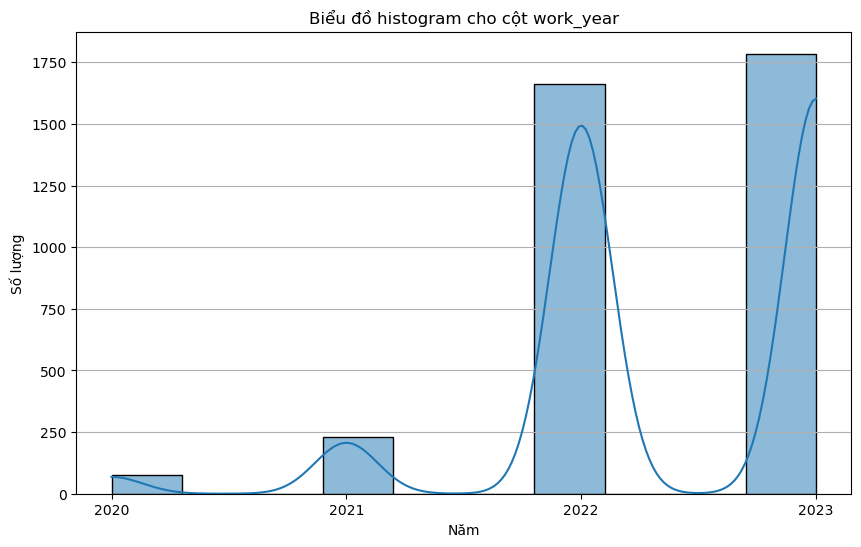

In [25]:
year_counts = df['work_year'].value_counts()
print(year_counts)

# Vẽ histogram cho cột work_year
plt.figure(figsize=(10, 6))
sns.histplot(df['work_year'], bins=10, kde=True)  # kde=True để vẽ đường phân phối
plt.title('Biểu đồ histogram cho cột work_year')
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.xticks(range(df['work_year'].min(), df['work_year'].max() + 1))  # Đặt nhãn trục x
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ nhìn
plt.show()

*Cột `experience_level`*

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64


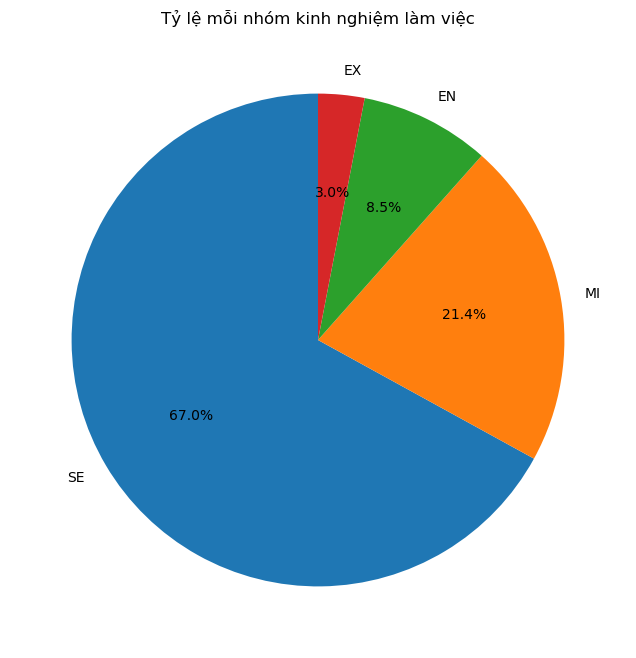

In [44]:
# Tần suất cho cột experience_level
experience_counts = df['experience_level'].value_counts()
print(experience_counts)

# Biểu đồ tròn cho experience_level
plt.figure(figsize=(8, 8))
experience_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ mỗi nhóm kinh nghiệm làm việc')
plt.ylabel('')  # Ẩn nhãn trục y
plt.show()


*Cột `employment_type`*

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64


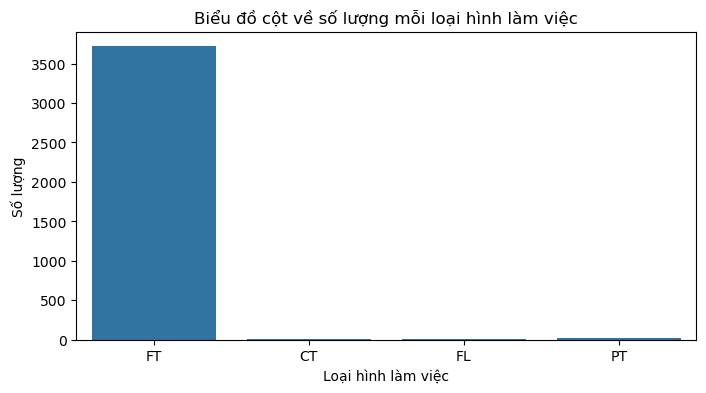

In [27]:
# Tần suất cho cột employment_type
employment_type_counts = df['employment_type'].value_counts()
print(employment_type_counts)

# Biểu đồ cột cho employment_type
plt.figure(figsize=(8, 4))
sns.countplot(x='employment_type', data=df)
plt.title('Biểu đồ cột về số lượng mỗi loại hình làm việc')
plt.xlabel('Loại hình làm việc')
plt.ylabel('Số lượng')
plt.show()

*Cột `job_title`*

In [22]:
# Tần suất cho cột job_title
job_title_counts = df['job_title'].value_counts()
print(job_title_counts)


Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64


*Cột `salary`*

Text(0, 0.5, 'Số lượng')

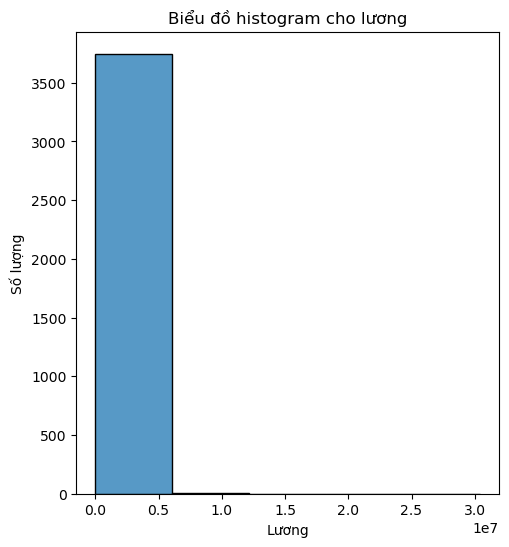

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['salary'], bins=5)
plt.title('Biểu đồ histogram cho lương')
plt.xlabel('Lương')
plt.ylabel('Số lượng')


*Cột `salary_currency`*

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64


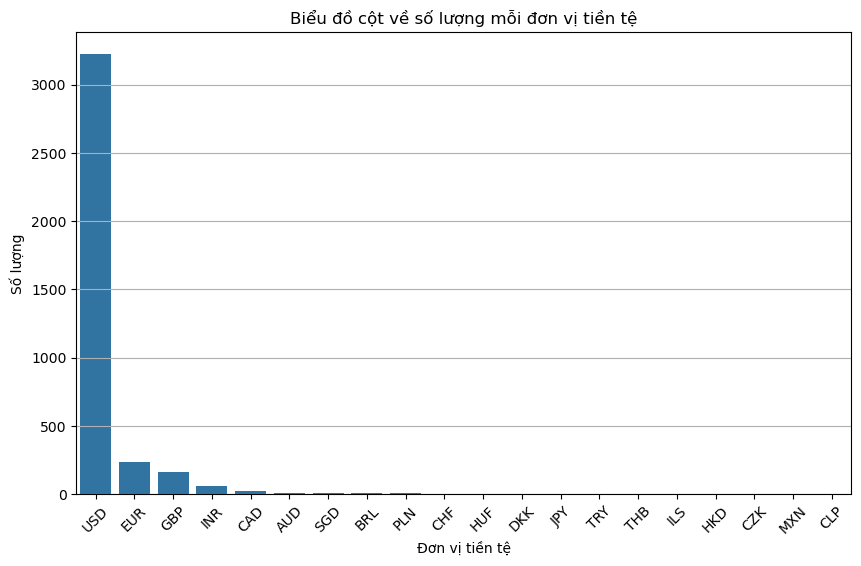

In [36]:
# Tần suất cho cột salary_currency
salary_currency_counts = df['salary_currency'].value_counts()
print(salary_currency_counts)

# Vẽ biểu đồ cột cho cột salary_currency
plt.figure(figsize=(10, 6))
sns.countplot(x='salary_currency', data=df, order=df['salary_currency'].value_counts().index)
plt.title('Biểu đồ cột về số lượng mỗi đơn vị tiền tệ')
plt.xlabel('Đơn vị tiền tệ')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ nhìn
plt.show()



*Cột `salary_in_usd`*

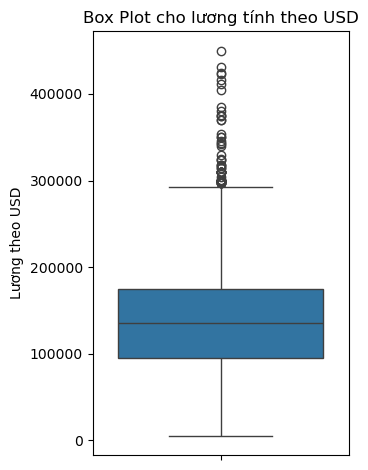

In [39]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salary_in_usd'])
plt.title('Box Plot cho lương tính theo USD')
plt.ylabel('Lương theo USD')

plt.tight_layout()
plt.show()


*Cột `employee_residence`*

In [42]:
# Tần suất cho cột employee_residence
employee_residence_counts = df['employee_residence'].value_counts()
print(employee_residence_counts)


US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64


*Cột `remote_ratio`*

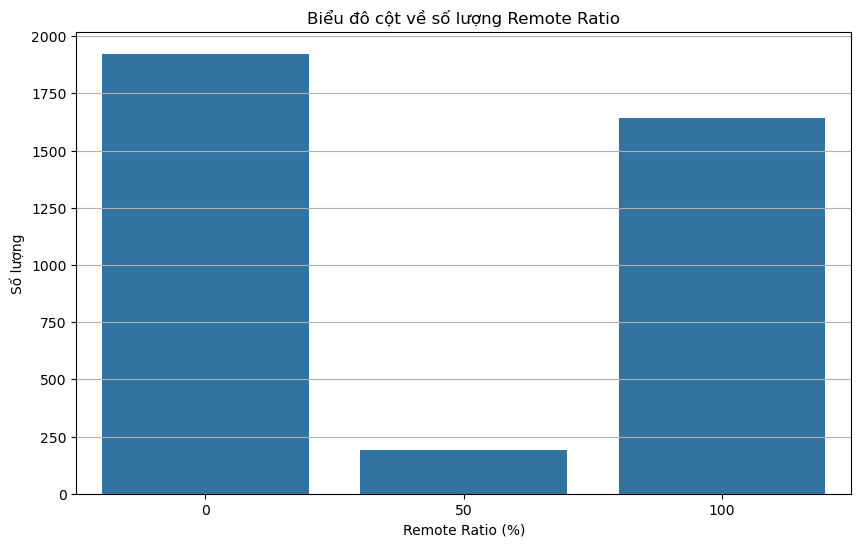

In [49]:
# Nhóm remote_ratio và tính tần suất
remote_ratio_counts = df['remote_ratio'].value_counts().sort_index()

# Vẽ biểu đồ cột cho remote_ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_ratio_counts.index, y=remote_ratio_counts.values)
plt.title('Biểu đô cột về số lượng Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Số lượng')
plt.grid(axis='y')  # Thêm lưới cho trục y để dễ nhìn
plt.show()


*Cột `company_location`*

In [51]:
# Tần suất cho cột company_location
company_location_counts = df['company_location'].value_counts()
print(company_location_counts)



US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64


*Cột `company_size`*

M    3153
L     454
S     148
Name: company_size, dtype: int64


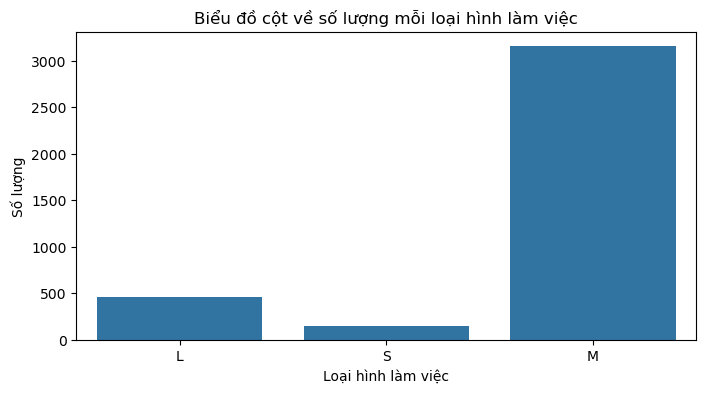

In [52]:
# Tần suất cho cột company_size
employment_type_counts = df['company_size'].value_counts()
print(employment_type_counts)

# Biểu đồ cột cho employment_type
plt.figure(figsize=(8, 4))
sns.countplot(x='company_size', data=df)
plt.title('Biểu đồ cột về số lượng mỗi loại hình làm việc')
plt.xlabel('Loại hình làm việc')
plt.ylabel('Số lượng')
plt.show()

### Data preprocessing ###

* Kiểm tra xem có dữ liệu bị thiếu không

In [53]:
# Check if data is null
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

* Kiểm tra xem dữ liệu có bị trùng lắp không

In [54]:
# Check for duplication
df.duplicated().sum()

1171

Phát hiện trùng lắp dữ liệu => xóa bỏ trùng lắp bằng câu lệnh:

In [56]:
# Eraser duplication
df.drop_duplicates(inplace=True)

* Kiểm tra kích thước của tập dữ liệu

In [58]:
# Size of dataset
df.shape

(2584, 11)

/tmp/ipykernel_18227/554015397.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_df.index, y='count', data=combined_df, ax=ax1, palette='viridis', alpha=0.6)


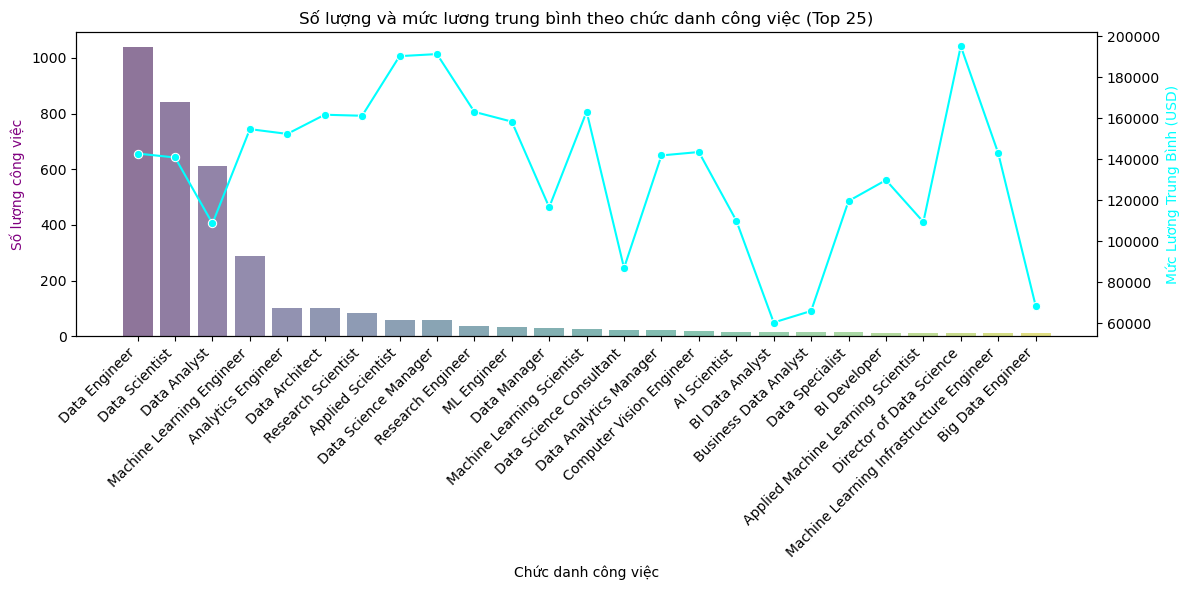

In [4]:
counts=df['job_title'].value_counts().head(25)

# Filter the DataFrame based on job titles in counts.index
filtered_df = df[df['job_title'].isin(counts.index)]

# Group by job_title and calculate the average salary
average_salary = filtered_df.groupby('job_title')['salary_in_usd'].mean()

# Create a DataFrame
combined_df = pd.DataFrame({'count': counts, 'average_salary': average_salary})
combined_df = combined_df.sort_values(by='count', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for counts
sns.barplot(x=combined_df.index, y='count', data=combined_df, ax=ax1, palette='viridis', alpha=0.6)
plt.xticks(rotation=45, ha='right')

# Create a second y-axis
ax2 = ax1.twinx()

# Line plot for average salary
sns.lineplot(x=combined_df.index, y='average_salary', data=combined_df, ax=ax2, color='cyan', marker='o')

# Customize axes
ax1.set_ylabel('Số lượng công việc', color='purple')
ax2.set_ylabel('Mức Lương Trung Bình (USD)', color='cyan')
ax1.set_xlabel('Chức danh công việc')
plt.title('Số lượng và mức lương trung bình theo chức danh công việc (Top 25)')

# Ensure x-ticks align with the bars
# ax1.set_xticks(range(len(combined_df.index)))  # Set the positions of the ticks
# ax1.set_xticklabels(combined_df.index, rotation=45, ha='right')  # Set the tick labels and rotate them

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


## Phân Tích Số Lượng Công Việc và Mức Lương Trung Bình Theo Chức Danh Nghề Nghiệp Trong Ngành Khoa Học Dữ Liệu

Biểu đồ này nhằm tìm hiểu số lượng công việc và mức lương trung bình tương ứng cho mỗi chức danh công việc trong ngành Khoa Học Dữ Liệu. Những thông tin này sẽ giúp sinh viên nhận định về thị trường lao động trong ngành dữ liệu và hỗ trợ đưa ra quyết định phát triển kỹ năng phù hợp với nhu cầu và xu hướng lương, giúp định hướng nghề nghiệp tương lai.

**Loại Biểu Đồ Sử Dụng:**  
- **Biểu đồ cột:** Thể hiện số lượng công việc cho từng chức danh.
- **Biểu đồ đường:** Thể hiện mức lương trung bình tương ứng cho các chức danh đó.

**Lý do lựa chọn biểu đồ cột kết hợp với biểu đồ đường:**
Em sử dụng biểu đồ cột (đối với số lượng công việc) kết hợp với biểu đồ đường (đối với mức lương trung bình). Lý do là vì để thể hiện sự so sánh rõ nhất giữa các chức danh nghề nghiệp này. Nói về biểu đồ để so sánh thì ngoài biểu đồ cột và đường ra còn có biểu đồ tròn, nhưng biểu đồ tròn phù hợp hơn trong việc thể hiện tỷ lệ, cơ cấu. Tập dữ liệu này có rất nhiều chức danh nghề nghiệp vì vậy nếu biểu diễn bằng biểu đồ tròn sẽ không được trực quan. Hơn hết biểu đồ tròn không thể cho ta thấy liền được số lượng công việc cụ thể nên em không chọn biểu đồ tròn. Biểu đồ cột và đường lại rất phù hợp cho việc này, không chỉ thể hiện được số lượng mà còn dễ dàng so sánh. Lý do em chọn biểu đồ cột kết hợp với biểu đồ đường mà không phải 2 biểu đồ cột hoặc 2 biểu đồ đường là vì để tăng thêm sự đa dạng biểu đồ khiến cho thu hút hơn. Và vì có rất nhiều chức danh nghề nghiệp nên nếu vẽ biểu đồ cột đôi thì lại quá nhiều cột, khó mà quan sát.

---

### **Phân Tích**
##### 1. Phân Bố Số Lượng Công Việc Theo Chức Danh
Số lượng công việc giữa các chức danh nghề nghiệp có sự khác biệt rõ rệt. Các chức danh phổ biến hơn có cột biểu đồ cao hơn, phản ánh nhu cầu của thị trường lao động:
- Những công việc liên quan đến phân tích và triển khai mô hình máy học, như **Data Scientist**, **Data Engineer**, và **Machine Learning Engineer**, có số lượng lớn hơn, cho thấy thị trường đang gia tăng nhu cầu cho các vị trí này.

*=> Khoa học Dữ liệu và Machine Learning đang phát triển mạnh mẽ, dẫn đến sự gia tăng nhu cầu về các công việc phân tích dữ liệu và kỹ thuật máy học.*

##### 2. Mức Lương Trung Bình và Sự Khác Biệt Giữa Các Ngành
Mức lương trung bình có sự chênh lệch lớn giữa các vị trí, cho thấy các yêu cầu khác nhau về độ phức tạp và kỹ năng:
- Những vị trí yêu cầu chuyên môn cao, như **Machine Learning Engineer** và **AI Scientist**, có mức lương trung bình cao hơn.
- Các vị trí như **Data Architect** hoặc **Data Science Manager** cũng có mức lương cao, do yêu cầu về kỹ năng quản lý dữ liệu và lập kế hoạch hệ thống, cùng khả năng lãnh đạo.

##### 3. Mối Liên Hệ Giữa Số Lượng Công Việc và Mức Lương
- Một số vị trí có số lượng công việc lớn nhưng mức lương trung bình thấp hơn, như **Data Analyst** hoặc **Business Intelligence Analyst**. Điều này có thể là do công việc dễ tiếp cận hơn và chỉ yêu cầu kỹ năng cơ bản.
- Ngược lại, các vai trò có số lượng ít nhưng mức lương cao hơn, như **Data Architect** hoặc **Machine Learning Researcher**, thường yêu cầu kỹ năng chuyên sâu, kinh nghiệm và kiến thức rộng về thuật toán, lập trình, và triển khai mô hình.

*=> Các vị trí này đòi hỏi chuyên môn cao và thường là những công việc yêu cầu nhiều kinh nghiệm và khả năng chuyên môn hóa.*

---

#### Kết luận
Dựa trên biểu đồ này, sinh viên có thể đưa ra định hướng phát triển kỹ năng và lựa chọn nghề nghiệp trong lĩnh vực Khoa Học Dữ Liệu phù hợp với xu hướng thị trường.


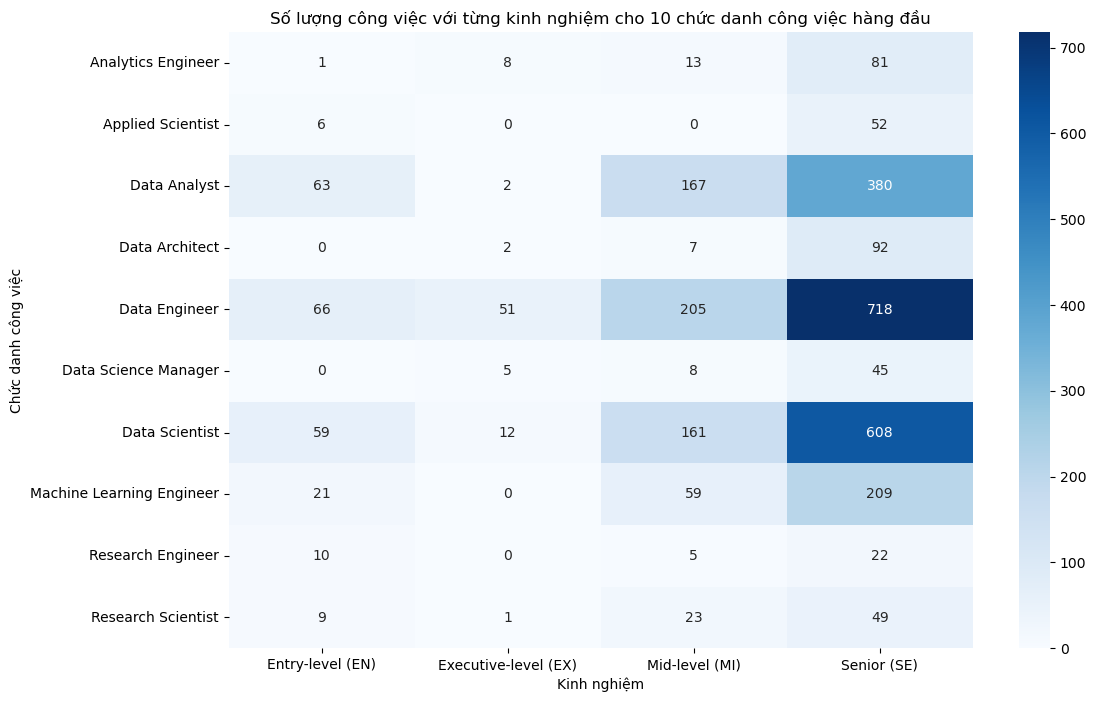

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bước 1: Tìm 10 tiêu đề công việc hàng đầu
top_10_job_titles = df['job_title'].value_counts().head(10).index

# Bước 2: Lọc dữ liệu chỉ cho những tiêu đề công việc hàng đầu
filtered_df = df[df['job_title'].isin(top_10_job_titles)]

# Bước 3: Tạo bảng tổng hợp (pivot table)
heatmap_data = filtered_df.pivot_table(index='job_title', columns='experience_level', aggfunc='size', fill_value=0)

# Bước 4: Tạo heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')

# Thay đổi nhãn trên trục x
new_labels = ['Entry-level (EN)', 'Executive-level (EX)', 'Mid-level (MI)', 'Senior (SE)']
heatmap.set_xticklabels(new_labels, rotation=0, ha='center')

plt.title('Số lượng công việc với từng kinh nghiệm cho 10 chức danh công việc hàng đầu')
plt.xlabel('Kinh nghiệm')
plt.ylabel('Chức danh công việc')
plt.show()

## Phân Tích Số Lượng Công Việc ứng với các Mức Độ Kinh Nghiệm Làm Việc Theo Chức Danh Nghề Nghiệp Trong Ngành Khoa Học Dữ Liệu

Biểu đồ này nhằm tìm hiểu số lượng công việc qua từng mức độ kinh nghiệm tương ứng cho mỗi chức danh công việc trong ngành Khoa Học Dữ Liệu. Những thông tin này sẽ giúp sinh viên nhận định về thị trường lao động trong ngành dữ liệu và hỗ trợ đưa ra quyết định vị trí dễ kiếm việc khi ra trường (thường là `Entry level`) để rồi có thể dần chuyển qua các vị trí khác khi đã có đủ kinh nghiệm

**Loại Biểu Đồ Sử Dụng:**  
- **Biểu đồ heatmap:** Thể hiện số lượng công việc cho từng chức danh và mức kinh nghiệm tương ứng

**Lý do lựa chọn biểu đồ cột heatmap:**
Vì Heatmap là một trong những biểu đồ thích hợp để biểu diễn mối quan hệ giữa các biến. Ngoài heatmap thì còn có các biểu đồ scatter (biểu đồ phân tán) và biểu đồ bubble (biểu đồ bong bóng), ... Nhưng 2 biểu đồ trên khó có thể cho được một số lượng cụ thể chính xác về số lượng công việc nên em đã không lựa chọn. Hoặc có thể sử dụng các biểu đồ khác nữa nhưng có thể gây khó cho người không có đủ kiến thức có thể quan sát, nên em chọn Heatmap là biểu đồ thích hợp nhất, phù hợp với đa số mọi ngừoi

---

### **Phân Tích**
##### 1. Phân Bố Nhu Cầu Công Việc Theo Cấp Độ Kinh Nghiệm (Experience Level Demand)
Các công việc trong lĩnh vực khoa học dữ liệu thường có nhiều cấp độ kinh nghiệm từ `Entry-level` (EN) đến `Senior` (SE), phản ánh nhu cầu đa dạng của thị trường lao động:
- `Entry-level` (EN): Các công việc có cấp độ này thường chiếm tỷ lệ lớn trong các chức danh phổ biến như `Data Analyst` và `Data Engineer`. Điều này có thể cho thấy đây là các vai trò dễ tiếp cận cho những người mới vào ngành, vì yêu cầu về kỹ năng có thể ít phức tạp hơn so với các cấp bậc cao hơn.
- Các cấp độ kinh nghiệm cao hơn như `Senior` hoặc `Executive-level` có xu hướng xuất hiện nhiều hơn ở những chức danh có yêu cầu chuyên môn cao như `Machine Learning Engineer` hoặc `Data Architect`. Các công việc này thường cần kiến thức và kỹ năng chuyên sâu về dữ liệu và kỹ thuật, và ít phù hợp hơn với người mới.

##### 2. Mối Quan Hệ Giữa Chức Danh Công Việc và Cấp Độ Kinh Nghiệm (Job Title vs. Experience Level)
Một số chức danh có sự phân bổ đồng đều ở nhiều cấp độ kinh nghiệm, trong khi những chức danh khác tập trung chủ yếu vào một vài cấp độ nhất định:
- `Data Engineer`, `Data Analyst` và `Data Scientist` thường có sự phân bổ đều từ Entry-level đến Mid-level. Điều này có thể là do các vai trò này xuất hiện ở nhiều lĩnh vực khác nhau, từ doanh nghiệp nhỏ đến tập đoàn lớn, đòi hỏi các cấp độ kinh nghiệm khác nhau.
- Ngược lại, `Data Architect` và `Machine Learning Engineer` tập trung ở `Mid-level` và `Senior`, cho thấy những vai trò này có xu hướng tuyển dụng các chuyên gia có kinh nghiệm hơn.

##### 3. Quy Luật Tuyển Dụng và Xu Hướng Thăng Tiến (Hiring Trends and Career Progression)
- Có thể thấy rằng các công việc chuyên sâu như `Machine Learning Engineer` hoặc `Data Scientist` thường có nhiều cơ hội cho người có kinh nghiệm (Senior và Executive). Điều này phản ánh quy luật thị trường khi nhu cầu về chuyên môn hóa cao được đặt lên hàng đầu.
- Các công việc phổ biến hơn và có lộ trình thăng tiến rõ ràng như `Data Analyst` và `Data Engineer` tạo cơ hội cho nhiều cấp độ, từ Entry-level đến Senior. Đây là con đường tốt cho những ai muốn bắt đầu và thăng tiến trong lĩnh vực dữ liệu.

---

#### Kết luận
Nhìn chung, số lượng công việc dành cho Entry-Level khá ít, điều này làm tăng tỷ lệ cạnh tranh việc làm ở mức độ này, nhất là đối với các bạn sinh viên ngành Khoa Học Dữ Liệu mới ra trường. Tuy nhiên khi đã có kinh nghiệm, số lượng công việc cho cấp `Senior` trở lên khá nhiều và đa dạng, thể hiện mức độ cạnh tranh đã giảm và nhiều cơ hội thăng tiến trong nghề nghiệp
- Các công việc dễ tiếp cận cho người mới thường là `Data Analyst` và `Data Engineer`, vì có nhiều cơ hội ở cấp `Entry-level` và `Mid-level`.
- Các công việc cần chuyên môn sâu hơn và kinh nghiệm như `Data Architect` và `Machine Learning Engineer` thường đòi hỏi cấp độ `Senior` hoặc `Executive`.

Tóm lại, mức độ yêu cầu kinh nghiệm có sự khác biệt rõ ràng giữa các chức danh công việc, phản ánh quy luật thị trường và xu hướng phát triển trong lĩnh vực dữ liệu.

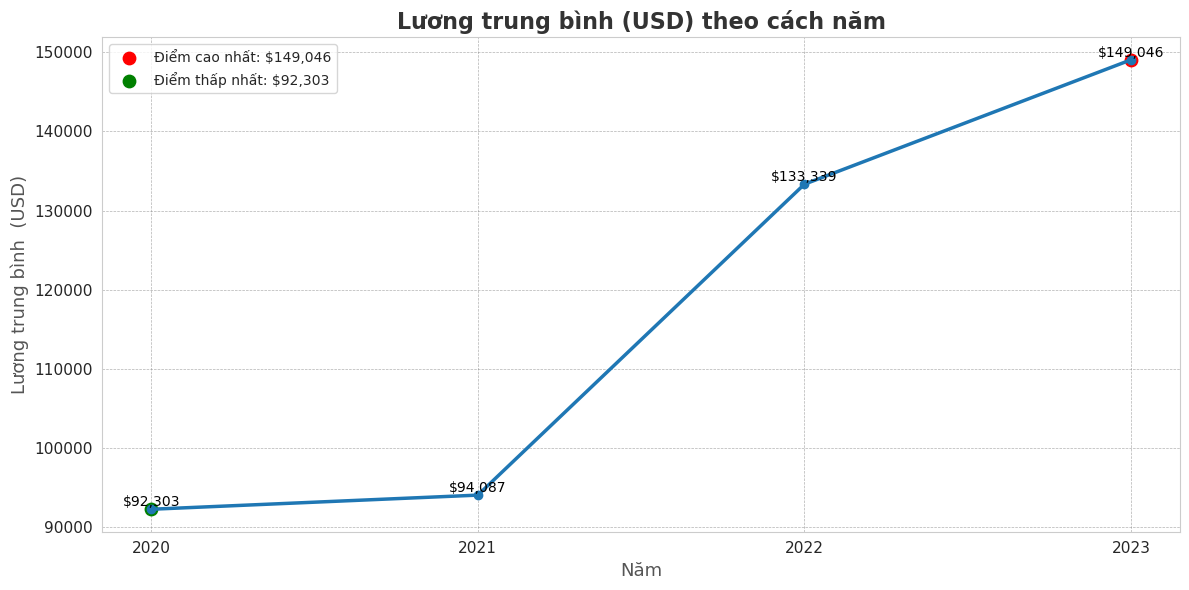

In [17]:
# Nhóm dữ liệu theo 'work_year' và tính lương trung bình cho mỗi năm
average_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean()

# Thiết lập phong cách và bảng màu cho biểu đồ
sns.set_style("whitegrid")  # Đặt nền có lưới trắng
sns.set_palette("muted")    # Chọn bảng màu nhẹ nhàng

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
plt.plot(
    average_salary_per_year.index, 
    average_salary_per_year.values, 
    marker='o', 
    color='#1f77b4',      # Chọn màu cho đường biểu đồ
    linestyle='-', 
    linewidth=2.5         # Đặt độ dày của đường để dễ nhìn hơn
)

# Thêm nhãn dữ liệu (lương trung bình) tại mỗi điểm
for x, y in zip(average_salary_per_year.index, average_salary_per_year.values):
    plt.text(x, y, f'${y:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Tùy chỉnh tiêu đề và nhãn trục
plt.title('Lương trung bình (USD) theo cách năm', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Năm', fontsize=13, color='#555555')
plt.ylabel('Lương trung bình  (USD)', fontsize=13, color='#555555')

# Thêm lưới và định dạng các tick
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray', alpha=0.6)
plt.xticks(average_salary_per_year.index, fontsize=11)
plt.yticks(fontsize=11)

# Đánh dấu điểm lương cao nhất và thấp nhất
plt.scatter(
    average_salary_per_year.idxmax(), 
    average_salary_per_year.max(), 
    color='red', 
    s=80, 
    label=f'Điểm cao nhất: ${average_salary_per_year.max():,.0f}'
)
plt.scatter(
    average_salary_per_year.idxmin(), 
    average_salary_per_year.min(), 
    color='green', 
    s=80, 
    label=f'Điểm thấp nhất: ${average_salary_per_year.min():,.0f}'
)

# Thêm chú thích (legend) cho các điểm nổi bật
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


## Phân Tích Mức Lương Trung Bình của tất cả các ngành nghề thuộc Khoa Học Dữ Liệu qua các năm (2020 - 2023)

Biểu đồ này phân tích mức lương trình bình của các ngành nghề thuộc lĩnh vực khoa học dữ liệu qua các năm 2020 - 2023. Từ đó có thể dự đoán xu hướng trong tư lai

**Loại Biểu Đồ Sử Dụng:**  
- **Biểu đồ đường:** Thể hiện mức lương trung bình qua các năm

**Lý do lựa chọn biểu đồ cột heatmap:**
Để thể hiện sự thay đổi của 1 biến theo thời gian thì biểu đồ đường là phù hợp nhất, vì nó thể hiện độ dốc của đường dữ liệu giúp thấy rõ sự tăng/ giảm nhanh hay chậm của dữ liệu. Điều này khó có thể làm được với biểu đồ cột

---

### **Phân Tích**
##### 1. Tăng trưởng lương qua các năm
- **2020-2021**: Mức lương trung bình tăng nhẹ, từ khoảng $92,303 lên $94,087. Đây là mức tăng không đáng kể, cho thấy lương không có biến động mạnh trong giai đoạn này.

- **2021-2022**: Mức lương tăng mạnh hơn đáng kể, từ $94,087 lên $133,339. Đây là một mức tăng lớn, có thể liên quan đến sự gia tăng nhu cầu cho các vị trí công việc, đặc biệt trong ngành công nghệ, dữ liệu và các ngành liên quan.

- **2022-2023**: Mức lương tiếp tục tăng, lên đến $149,046. Tuy tốc độ tăng vẫn mạnh, nhưng không bằng giai đoạn 2021-2022.
##### 2. Lý giải:
- **Đại dịch COVID-19**: Năm 2020 là thời điểm đại dịch bắt đầu và gây ra nhiều khó khăn cho nền kinh tế. Các công ty hạn chế tuyển dụng, tập trung cắt giảm chi phí, dẫn đến mức lương không có sự thay đổi lớn.

- **Nhu cầu chuyển đổi số và tăng trưởng thị trường việc làm từ xa**: Sau đại dịch, có sự bùng nổ trong nhu cầu chuyển đổi số, đặc biệt trong các ngành công nghệ, tài chính, y tế. Điều này đẩy nhu cầu tuyển dụng nhân lực IT, kỹ sư phần mềm và các chuyên gia kỹ thuật tăng cao. Các công ty sẵn sàng trả mức lương cao để thu hút nhân tài, dẫn đến mức lương trung bình tăng mạnh trong giai đoạn 2021-2022.

- **Điều chỉnh và ổn định lại**: Đến năm 2023, mặc dù nhu cầu nhân lực vẫn cao, các công ty bắt đầu điều chỉnh lại mức chi trả lương để duy trì ổn định tài chính, tránh tăng trưởng quá nóng. Điều này dẫn đến mức lương vẫn tăng nhưng với tốc độ chậm hơn so với giai đoạn trước, hoặc có thể là do thị trường tuyển dụng dần bão hòa

##### 3. Dự đoán và xu hướng trong tương lai:

Nếu thị trường việc làm tiếp tục ổn định, có thể mức lương sẽ tiếp tục tăng nhưng với tốc độ vừa phải. Tuy nhiên, nếu có các yếu tố ảnh hưởng lớn (như sự ra đời của công nghệ mới hoặc khủng hoảng kinh tế), xu hướng này có thể thay đổi.

---

#### Kết luận

Biểu đồ phản ánh sự phát triển kinh tế và nhu cầu nhân lực trong ngành công nghiệp. Giai đoạn tăng trưởng nhanh sau đại dịch có thể sẽ chậm lại, nhưng mức lương trung bình có khả năng vẫn duy trì mức tăng đều đặn, phù hợp với xu hướng cạnh tranh trong thị trường lao động có kỹ năng cao.